# 路透社数据集

路透社数据集包含许多短新闻及其对应的主题，由路透社 1986 年发布。它是一个简单的、广泛使用的文本分类数据集，包含46 个不同的主题，某些主题包含的样本更多，但训练集中每个主题都至少有 10 个样本。

与 IMDB 和 MNIST 类似，Keras 内置有路透社数据集。

In [1]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


C:\Python38\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Python38\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


`num_words=10000` 将数据限定为前 10,000 个最常出现的单词。我们有 89982 个训练样本和 2246 个测试样本

In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

与 IMDB 评论一样，每个样本都是一个整数列表（表示单词索引）。

In [4]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [5]:
len(train_data[0])

87

In [6]:
len(train_data[1])

56

可以看到，每条新闻的长度不完全一样。

In [7]:
len(train_data[10])

31

可以通过如下方式将索引解码为新闻文本。

In [9]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [11]:
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


样本对应的标签是一个 0~45 范围内的证书，即话题索引编号。

In [12]:
train_labels[10]

3

## 准备数据

In [15]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i,sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [16]:
print(train_data.shape)
print(test_data.shape)

(8982,)
(2246,)


In [20]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [19]:
print(x_train.shape)
print(x_test.shape)

(8982, 10000)
(2246, 10000)


将所有新闻转换为长度为 10000 的向量

In [21]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

将标签向量化有两种方法，可以将标签列表转换为正数张量，或者使用 one-hot 编码。one-hot 编码是分类数据广泛使用的一种格式，也叫**分类编码**（categorical encoding）。

In [22]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [23]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

Keras 有内置方法可以实现上述操作，效果一样

In [24]:
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## 构建网络

构建神经网络，输出 46 个类别。

In [25]:
# 定义模型

from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

说明：

- 网络的最后一层是大小为 46 的 Dense 层。这意味着，对于每个输入样本，网络都会输出一个 46 维向量。这个向量的每个元素代表不同的输出类别。
- 最后一层使用 softmax 激活。网络将输出在 46 个不同输出类别上的概率分布——对于每个输入样本，网络都会输出一个 46 维向量，其中 `output[i]` 是样本属于第 i 个类别的概率。46 个概率的总和为 1.

对于该例子，最好的损失函数是 `categorical_crossentropy`（分类交叉熵）。它用于衡量两个概率分布之间的举例，这里两个概率分布分别是网络输出的概率分布和标签的真实分布。通过将这两个分布的概率最小化，训练网络可使输出结果尽可能接近真实标签。

In [26]:
model.compile(optimizer="rmsprop",loss="categorical_crossentropy", metrics=['accuracy'])

In [27]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [28]:
history = model.fit(partial_x_train, partial_y_train, 
                    epochs=20, 
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 26ms/step - loss: 2.5914 - accuracy: 0.5319 - val_loss: 1.6977 - val_accuracy: 0.6660
Epoch 2/20
16/16 [==============================] - 0s 14ms/step - loss: 1.3842 - accuracy: 0.7220 - val_loss: 1.2779 - val_accuracy: 0.7110
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 1.0200 - accuracy: 0.7823 - val_loss: 1.1217 - val_accuracy: 0.7590
Epoch 4/20
16/16 [==============================] - 0s 14ms/step - loss: 0.8090 - accuracy: 0.8307 - val_loss: 1.0110 - val_accuracy: 0.7940
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 0.6493 - accuracy: 0.8642 - val_loss: 0.9606 - val_accuracy: 0.8060
Epoch 6/20
16/16 [==============================] - 0s 13ms/step - loss: 0.5278 - accuracy: 0.8891 - val_loss: 0.9265 - val_accuracy: 0.8060
Epoch 7/20
16/16 [==============================] - 0s 13ms/step - loss: 0.4287 - accuracy: 0.9102 - val_loss: 0.9164 - val_accuracy: 0.8110
Epoch 8/20
16

下面来绘制损失曲线和精度曲线

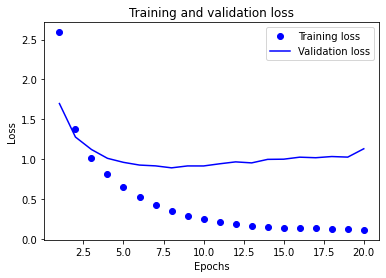

In [29]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

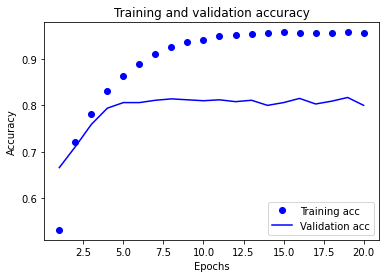

In [31]:
# 绘制训练精度和验证精度

plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

从图可以看出，网络在后面开始过拟合。我们从头开始训练一个新的网络，共 9 个轮次，然后在测试集上评估模型。

In [33]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 22ms/step - loss: 2.6330 - accuracy: 0.5187 - val_loss: 1.7701 - val_accuracy: 0.6570
Epoch 2/9
16/16 [==============================] - 0s 12ms/step - loss: 1.4359 - accuracy: 0.6983 - val_loss: 1.3180 - val_accuracy: 0.6980
Epoch 3/9
16/16 [==============================] - 0s 12ms/step - loss: 1.0485 - accuracy: 0.7764 - val_loss: 1.1274 - val_accuracy: 0.7550
Epoch 4/9
16/16 [==============================] - 0s 12ms/step - loss: 0.8190 - accuracy: 0.8256 - val_loss: 1.0324 - val_accuracy: 0.7820
Epoch 5/9
16/16 [==============================] - 0s 15ms/step - loss: 0.6465 - accuracy: 0.8667 - val_loss: 0.9710 - val_accuracy: 0.7870
Epoch 6/9
16/16 [==============================] - 0s 16ms/step - loss: 0.5094 - accuracy: 0.8984 - val_loss: 0.9250 - val_accuracy: 0.8120
Epoch 7/9
16/16 [==============================] - 0s 16ms/step - loss: 0.4129 - accuracy: 0.9181 - val_loss: 0.9173 - val_accuracy: 0.8110
Epoch 8/9
16/16 [===

In [34]:
results

[1.0056477785110474, 0.7858415246009827]

该方法可以得到约 80% 的精度。对于平衡的二分类问题，完全随机的分类器能够得到 50% 的精度。但是在这个例子中，完全随机的精度约为 19%，所以上述结果相当不错，至少和随机的基准比起来还不错。

In [35]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.188780053428317

## 在新数据上预测结果

模型的 `predict` 方法返回在 46 个主题上的概率分布。我们对所有测试数据生成主题预测。

In [36]:
predictions = model.predict(x_test)

# predictions 中的每个元素都是长度为 46 的向量。

In [37]:
predictions[0].shape

(46,)

In [38]:
# 这个向量所有元素总和为 1

np.sum(predictions[0])

0.99999994

In [39]:
# 值最大的元素就是预测类别，即概率最大的类别

np.argmax(predictions[0])

3

## 处理标签的另一种方法

直接将其转换为整数张量

In [40]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

对于这种编码，只需要改变损失函数。对于整数标签，此时应该使用 `sparse_categorical_crossentropy`

In [41]:
model.compile(optimizer="rmsprop", loss='sparse_categorical_crossentropy', metrics=['acc'])

这个新的损失函数在数学上与 `categorical_crossentropy` 完全相同，二者只是接口不同。